MULTIPLE LINEAR REGRESSION: BIKE SHARING 

CONLSUTING ISSUE AT HAND: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

GOAL:
1. To determine the factors that affect the demand for shared bikes 
2. The explanatory power of the variables 


## STEPS IN LINEAR REGRESSION 

1. DATA PREPARATION 
2. MODEL BUILDING: Built using 'cnt' as the target variable. 
3. MODEL EVALUATION 


In [1]:
#weathersit and season have values as 1,2,3,4 with labels. Check whether there is an order.
#Convert the variables into string values (Categories) by using encdoing. 
#Check the year variable 


#from sklearn.metrics import r2_score
#r2_score (y_test, y_pred)

### READING & PREPARING THE DATA 

In [2]:
# Supress Warnings: We do not want to have this 

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
bike_dataset = pd.DataFrame(pd.read_csv("day.csv"))
bike_dataset.head() #Displaying information read from the file
bike_dataset.info() #Displaying infromation about the data types
bike_dataset.describe() #Summary stats 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


###  DATA CLEANING 


In [5]:
bike_dataset.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

#### Upon careful examination of the columns: 
1. instant: the record index - Unnecessary column, can be indexed by the numbers 
2. dteday: the exact date is not necessary 
3. atemp and temp: atemp is more important than the temperature itself- 'the feels like' would contribute to similar explanations 
4. Casual or registered: the type of users dont matter- the fact that they got a bike does 


In [6]:
features = ['season', 'yr', 'mnth','holiday', 'weekday','workingday', 'weathersit', 'atemp', 'hum', 'windspeed',
        'cnt']
bike = bike_dataset[features]
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


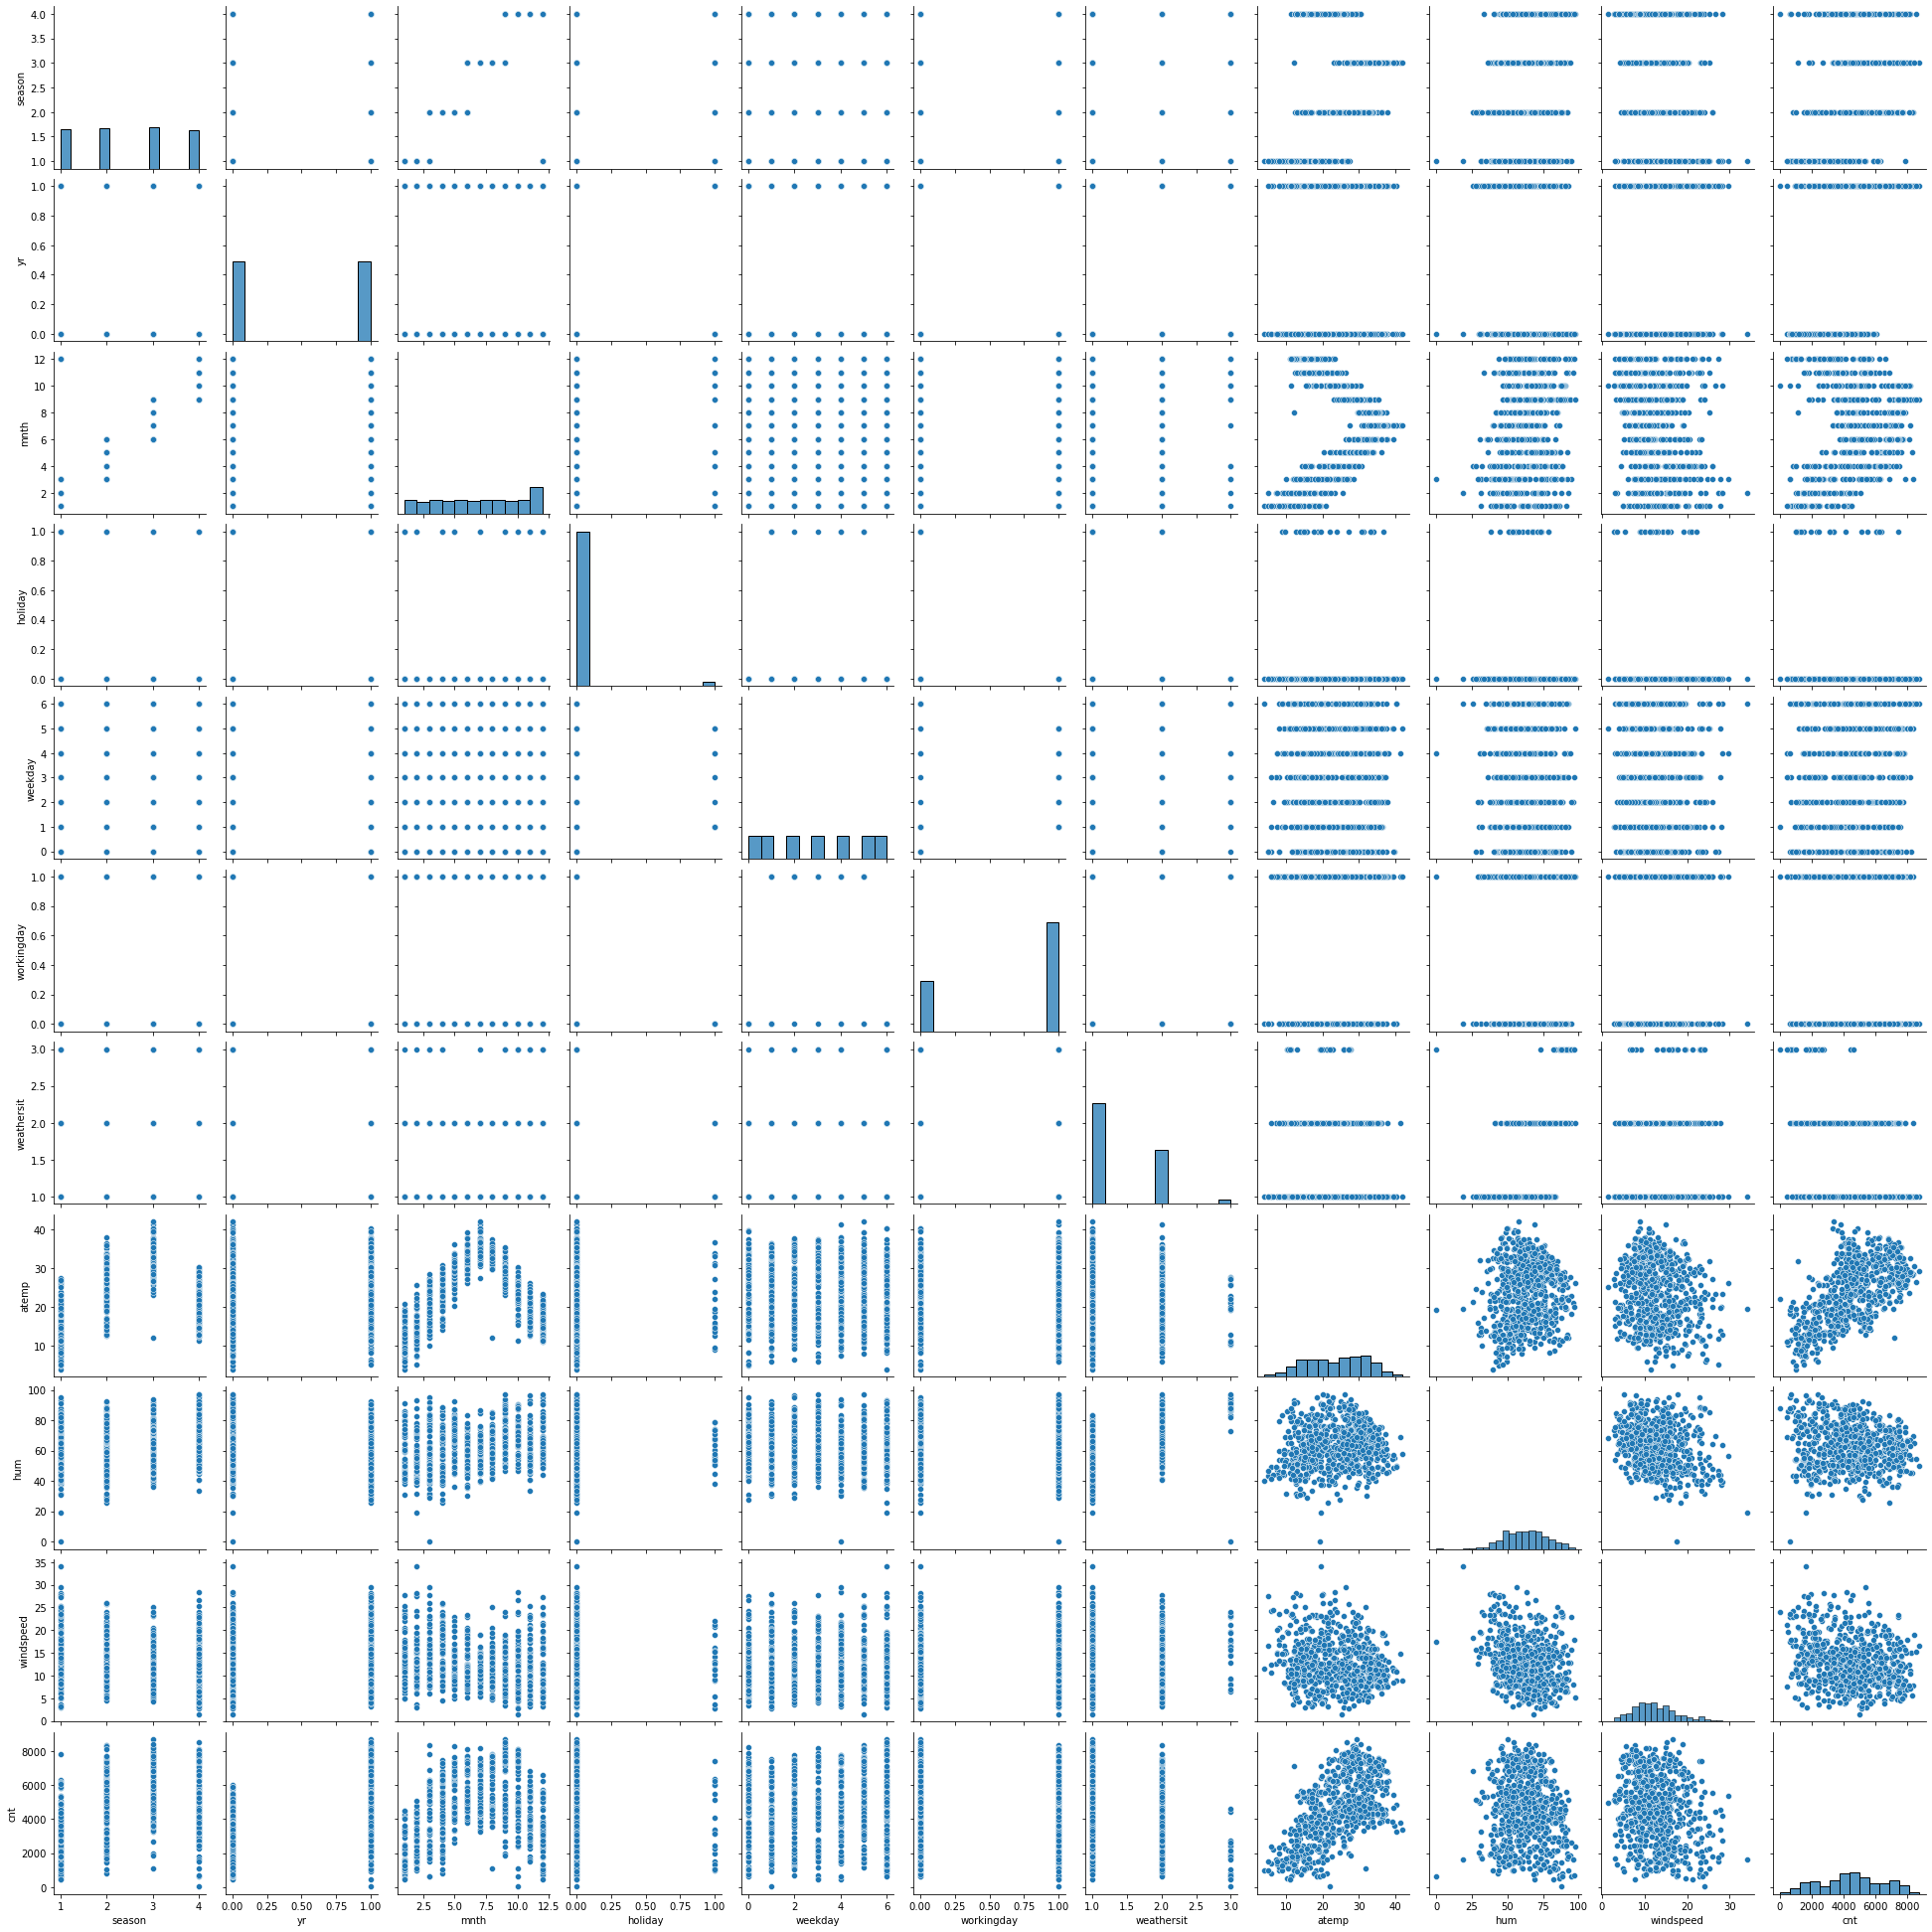

In [7]:
sns.pairplot(bike)
plt.show()

In [52]:
bike_dataset.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


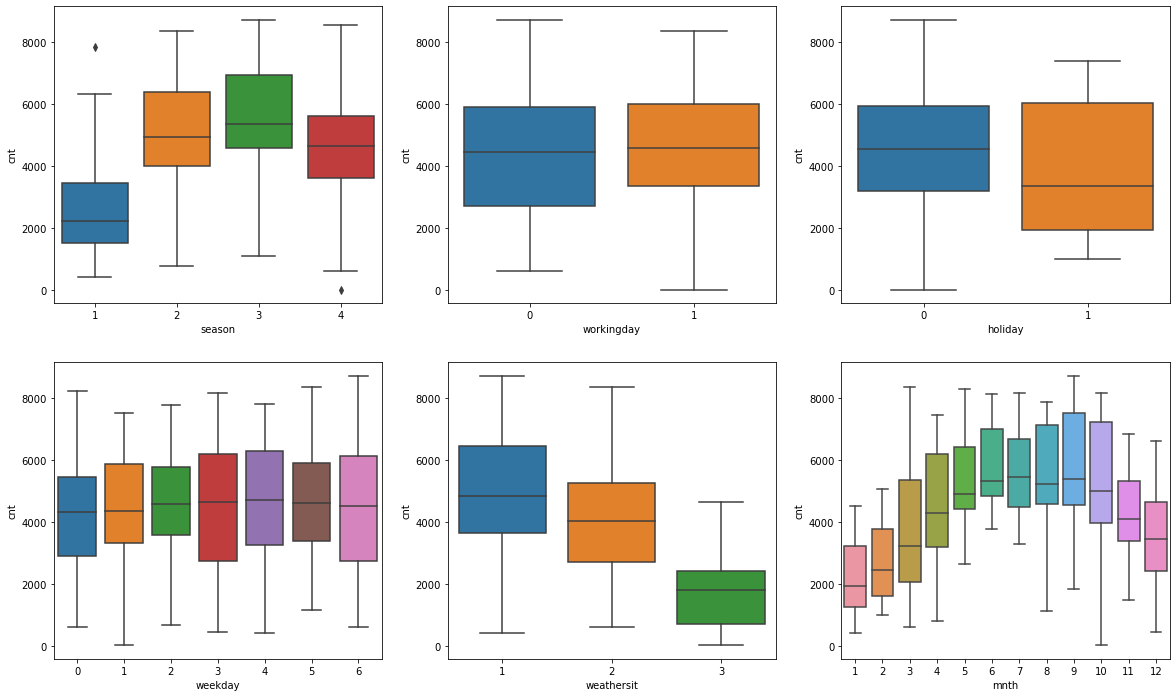

In [8]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data =bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.show()


*INFERENCES FROM THE CATEGORICAL VARIABLES*
1. Season: Season can be a good predictor because season 3 clearly produced a larger count in the number of bikes hired. Season 1 was the worst, this indicates a clear seasonality. 
2. Working day: With a much higher median when compared to the weekend, this might be a good predictor.
3. Holiday: A close call, holiday does not seem to be a good predictor
4. Weekday: Weekdays show an even spread too. Might be a below average predictor
5. Weather: Clearly a good predictor (shows a trend too) 
6. Month: Following with the season, specific months showcased a higher median compared to the others- Months 5 to 9 being the highest. 

In [9]:
# Creating the Dummy variable, and dropping the first dummy variable for each of the dummy variables created

bike = pd.get_dummies(bike, drop_first=True)
bike.info()
bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [10]:
bike.shape

(730, 11)

In [11]:
bike_weather = pd.get_dummies(bike['weekday'], drop_first=True,prefix = 'weather')
bike_weather.info()
bike_weather.head()
bike_season = pd.get_dummies(bike['season'], drop_first=True, prefix = 'season')
bike_season.info()
bike_season.head()
bike_month = pd.get_dummies(bike['mnth'], drop_first=True, prefix = 'month')
bike_month.info()
bike_month.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   weather_1  730 non-null    uint8
 1   weather_2  730 non-null    uint8
 2   weather_3  730 non-null    uint8
 3   weather_4  730 non-null    uint8
 4   weather_5  730 non-null    uint8
 5   weather_6  730 non-null    uint8
dtypes: uint8(6)
memory usage: 4.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   season_2  730 non-null    uint8
 1   season_3  730 non-null    uint8
 2   season_4  730 non-null    uint8
dtypes: uint8(3)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   month_2   730 non-null    uint8
 1   month_

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [12]:
bike_final = pd.concat([bike,bike_weather, bike_season, bike_month], axis=1)
bike_final.head()
bike_final = bike_final.drop(['mnth','weekday','season'], axis = 1)
bike_final.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,weather_1,weather_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,2,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,2,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


### SPLITTING THE DATASET INTO TEST AND TRAIN 


In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(bike_final, train_size = 0.70, test_size = 0.30, random_state = 333)
df_train.info()
df_train.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   holiday     510 non-null    int64  
 2   workingday  510 non-null    int64  
 3   weathersit  510 non-null    int64  
 4   atemp       510 non-null    float64
 5   hum         510 non-null    float64
 6   windspeed   510 non-null    float64
 7   cnt         510 non-null    int64  
 8   weather_1   510 non-null    uint8  
 9   weather_2   510 non-null    uint8  
 10  weather_3   510 non-null    uint8  
 11  weather_4   510 non-null    uint8  
 12  weather_5   510 non-null    uint8  
 13  weather_6   510 non-null    uint8  
 14  season_2    510 non-null    uint8  
 15  season_3    510 non-null    uint8  
 16  season_4    510 non-null    uint8  
 17  month_2     510 non-null    uint8  
 18  month_3     510 non-null    uint8  
 19  month_4     510 non-null   

(510, 28)

#### VISUALIZATION OF THE NUMERICAL VARIABLES
Even though we visualized the variables prior, let's get into visualizing the numerical variables in the new data frame. 

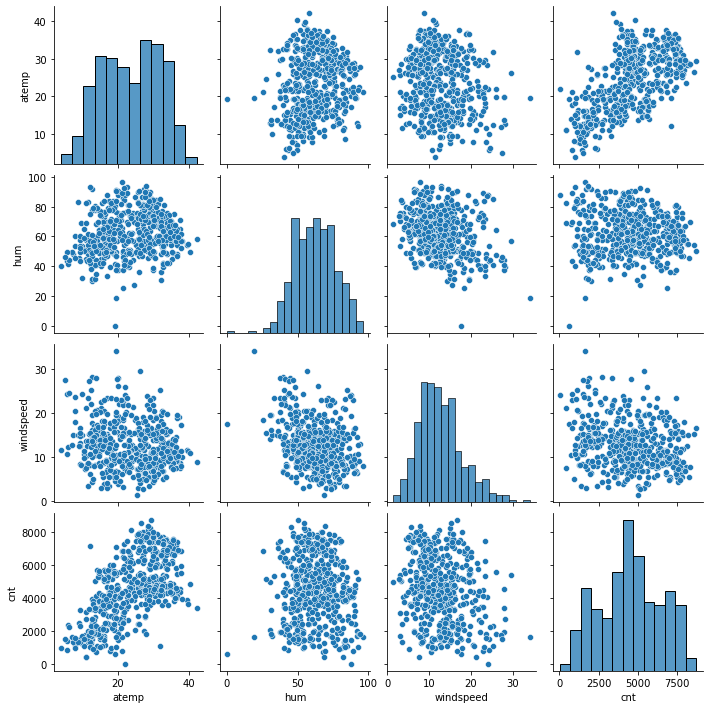

In [14]:
bike_numerical = df_train [['atemp', 'hum', 'windspeed', 'cnt']]
#Remember that we are trying to predict the value of 'cnt'

sns.pairplot (bike_numerical)

The graph above helps us draw inferences about the relationships between the variables: 
1. Count- clearly has a linear relationship with temperature, humidity and windspeed 
2. Focusing on the above, we will remember the importance that we have established here
3. The relationship between count and the other variables have already been established earlier 

<function matplotlib.pyplot.show(close=None, block=None)>

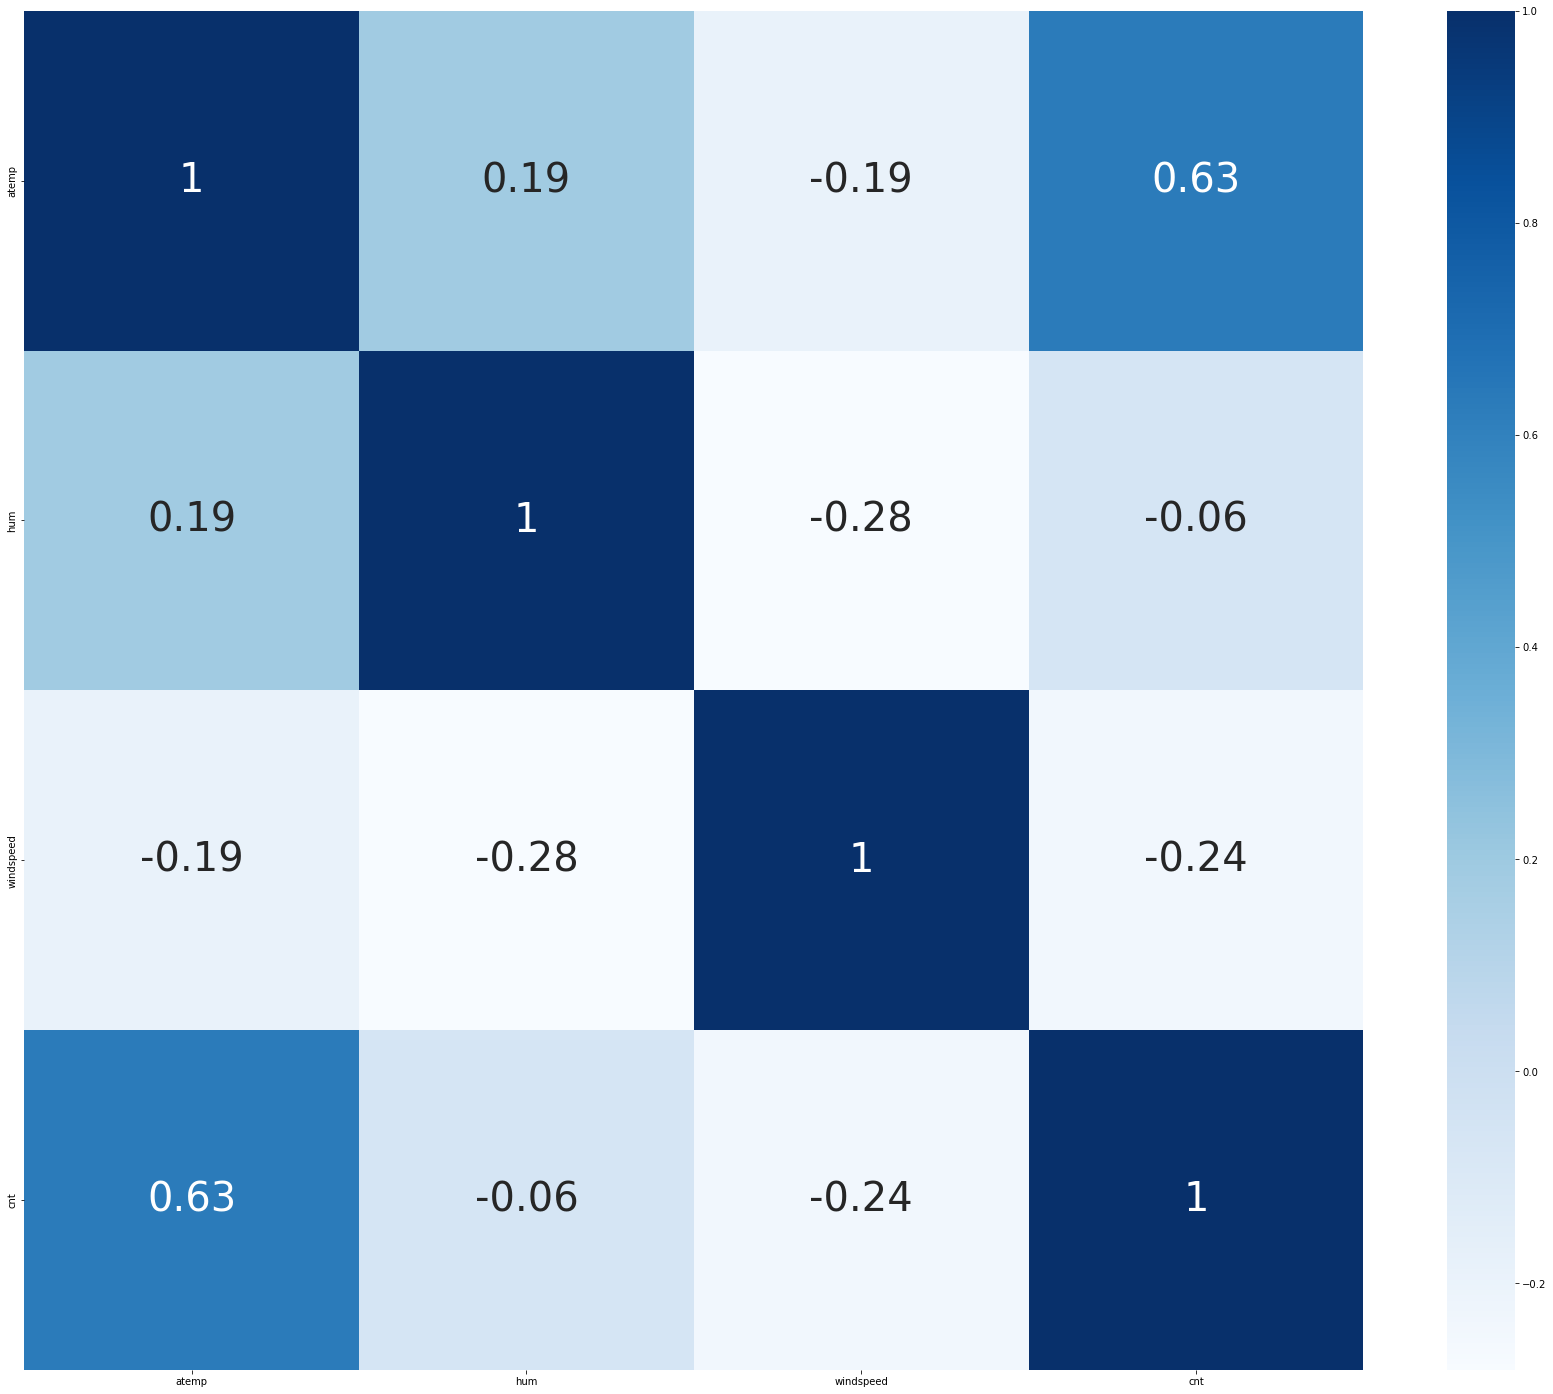

In [15]:
#CORRELATION MATRIX (heatmap)
plt.figure(figsize = (30,25))
sns.heatmap(bike_numerical.corr(),annot = True, cmap = 'Blues',annot_kws={'size': 40})
plt.show

#INFERENCE; The maximum correlation is between count and temperature, while windspeed has a negative correlation with count 


### RESCALING THE FEATURES 

In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

numerical = ['atemp', 'hum', 'windspeed', 'cnt']

df_train[numerical] = scaler.fit_transform(df_train[numerical])


In [17]:
df_train.head()

,yr,holiday,workingday,weathersit,atemp,hum,windspeed,cnt,weather_1,weather_2,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
483,1,0,0,1,0.487055,0.609956,0.194850,0.722734,0,0,...,0,1,0,0,0,0,0,0,0,0
650,1,0,0,1,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,1,0.819376,0.572294,0.276919,0.488265,1,0,...,0,0,0,0,0,1,0,0,0,0
714,1,0,0,2,0.381804,0.871429,0.161523,0.433042,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,1,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


## BUILDING A LINEAR MODEL 

The assignment mentioned that the predicted variable is 'cnt'. Therefore the data has to be split into two parts: 
y_train, which will take on the variable cnt 
X_train, which will take on the rest 

In [18]:
y_train = df_train.pop('cnt')

In [19]:

X_train = df_train

In [20]:
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE (lm, 12)
rfe = rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('weathersit', False, 5),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('weather_1', True, 1),
 ('weather_2', True, 1),
 ('weather_3', True, 1),
 ('weather_4', True, 1),
 ('weather_5', True, 1),
 ('weather_6', False, 6),
 ('season_2', False, 3),
 ('season_3', False, 4),
 ('season_4', True, 1),
 ('month_2', False, 16),
 ('month_3', False, 9),
 ('month_4', False, 13),
 ('month_5', False, 10),
 ('month_6', False, 12),
 ('month_7', False, 15),
 ('month_8', False, 11),
 ('month_9', False, 2),
 ('month_10', False, 14),
 ('month_11', False, 7),
 ('month_12', False, 8)]

In [21]:
col = X_train.columns[rfe.support_]
col


Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'weather_5', 'season_4'],
      dtype='object')

In [22]:
X_train.columns[~rfe.support_]

Index(['weathersit', 'weather_6', 'season_2', 'season_3', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')

In [23]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)



In [24]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          5.70e-152
Time:                        11:43:04   Log-Likelihood:                 416.10
No. Observations:                 510   AIC:                            -808.2
Df Residuals:                     498   BIC:                            -757.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.031      9.172      0.0

The following variables are insignifcant: 
1. Weather_2/3/4/5- the reason is probably ththe consistency of the seasons. 
2. Working day / holiday do not contribute to the explanation either 

In [25]:
X_train_new = X_train_rfe.drop(['weather_4','weather_2','weather_3','weather_5','workingday','holiday'],axis = 1                           )

In [26]:
X_train_new.head()

,const,yr,atemp,hum,windspeed,weather_1,season_4
483,1.0,1,0.487055,0.609956,0.194850,0,0
650,1.0,1,0.409971,0.513852,0.255118,0,1
212,1.0,0,0.819376,0.572294,0.276919,1,0
714,1.0,1,0.381804,0.871429,0.161523,0,1
8,1.0,0,0.048706,0.451083,0.700017,0,0


In [27]:
#REBUILDING THE MODEL 

#Adding a constant variable 
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit() #Running the linear model 


In [28]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     279.9
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          9.82e-157
Time:                        11:43:04   Log-Likelihood:                 413.43
No. Observations:                 510   AIC:                            -812.9
Df Residuals:                     503   BIC:                            -783.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2938      0.030      9.757      0.0

In [29]:
X_train_new.columns

Index(['const', 'yr', 'atemp', 'hum', 'windspeed', 'weather_1', 'season_4'], dtype='object')

In [31]:
X_train_new = X_train_new.drop(['weather_1'],axis = 1)

#### CALCULATE THE VIF FOR THE NEW MODEL

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.33
3,hum,1.15
2,atemp,1.14
4,windspeed,1.14
5,season_4,1.12
1,yr,1.02


The VIF For two parameters: 
1. The VIF is very high for the constant. 

In [34]:
X_train_next = X_train_new.drop(['const'],axis = 1)

In [35]:
#REBUILDING THE MODEL 

#Adding a constant variable 
import statsmodels.api as sm
X_train_lm1 = sm.add_constant(X_train_next)
lm1 = sm.OLS(y_train,X_train_lm1).fit() #Running the linear model 

In [37]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     333.6
Date:                Mon, 24 Jan 2022   Prob (F-statistic):          2.70e-157
Time:                        11:45:12   Log-Likelihood:                 411.74
No. Observations:                 510   AIC:                            -811.5
Df Residuals:                     504   BIC:                            -786.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2914      0.030      9.664      0.0

#### The above results indicate that the model variables are now signicant and we have achieved an R-square of clost to 77%. 

### RESIDUAL ANALYSIS OF THE TRAINING DATA 
We are going to check the distribution of the residuals to ensure that the data is homogenous, and evenly distrubted. 

In [40]:
y_train_count = lm1.predict(X_train_lm1)

Text(0.5, 0, 'ERRORS')

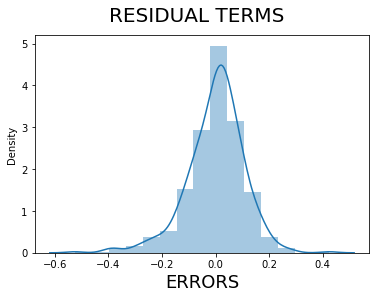

In [44]:
#Importing the librariries for plotting 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

#Plotting the histogram of error terms 

fig = plt.figure()
sns.distplot((y_train -y_train_count), bins = 15)
fig.suptitle('RESIDUAL TERMS', fontsize = 20) 
plt.xlabel ('ERRORS', fontsize = 18)

## MAKING PREDICATIONS 
Applying the saling on the test sets

In [46]:

df_test[numerical] = scaler.transform(df_test['atemp','hum','windspeed'])

KeyError: ('atemp', 'hum', 'windspeed')

In [48]:
y_test = df_test.pop('cnt')
X_test = df_test

In [49]:
#Using the created model to make predictions 

#Creating X_test_new data frame by keeping the varialbles that we like 
X_test_new = X_test[X_train_next.columns]

In [50]:
X_test_new = sm.add_constant(X_test_new)

#Making predictions 

y_pred = lm1.predict(X_test_new)

### MODEL EVALUATION 

Text(0, 0.5, 'y_pred')

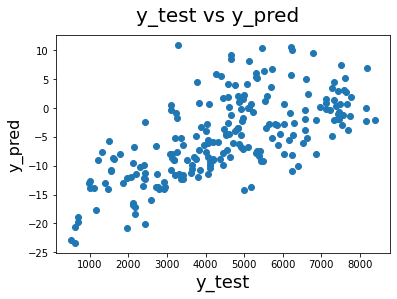

In [51]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label